# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                         "Lat": city_lat, 
                         "Lng": city_lng, 
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ust'-ilimsk
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | hamilton
Processing Record 5 of Set 1 | dudinka
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | invercargill
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | baise city
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | lashio
Processing Record 13 of Set 1 | tolanaro
Processing Record 14 of Set 1 | isafjordur
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | rurrenabaque
Processing Record 17 of Set 1 | blackmans bay
Processing Record 18 of Set 1 | bilibino
Processing Record 19 of Set 1 | hotan
Processing Record 20 of Set 1 | pekanbaru
Processing Record 21 of Set 1 | la passe
Processing Record 22 of Set 1 | adam
Processing Record 

Processing Record 37 of Set 4 | puerto san carlos
City not found. Skipping...
Processing Record 38 of Set 4 | bryne
Processing Record 39 of Set 4 | naranjo
Processing Record 40 of Set 4 | greenland
Processing Record 41 of Set 4 | broken hill
Processing Record 42 of Set 4 | rathdrum
Processing Record 43 of Set 4 | mirpur sakro
Processing Record 44 of Set 4 | antsiranana
Processing Record 45 of Set 4 | camamu
Processing Record 46 of Set 4 | college
Processing Record 47 of Set 4 | irtyshsk
Processing Record 48 of Set 4 | ilulissat
Processing Record 49 of Set 4 | hassi messaoud
Processing Record 0 of Set 5 | ambodifotatra
Processing Record 1 of Set 5 | la union
Processing Record 2 of Set 5 | port hedland
Processing Record 3 of Set 5 | los palacios y villafranca
Processing Record 4 of Set 5 | touros
Processing Record 5 of Set 5 | vytegra
Processing Record 6 of Set 5 | itaberaba
Processing Record 7 of Set 5 | malvan
Processing Record 8 of Set 5 | ciudad cuauhtemoc
Processing Record 9 of Set 

Processing Record 26 of Set 8 | quezon
Processing Record 27 of Set 8 | batam
City not found. Skipping...
Processing Record 28 of Set 8 | mahabad
Processing Record 29 of Set 8 | tamanrasset
Processing Record 30 of Set 8 | dali
Processing Record 31 of Set 8 | kalat
Processing Record 32 of Set 8 | catalao
Processing Record 33 of Set 8 | mil'kovo
Processing Record 34 of Set 8 | rapid valley
Processing Record 35 of Set 8 | sitia
Processing Record 36 of Set 8 | nora
Processing Record 37 of Set 8 | anar darah
Processing Record 38 of Set 8 | dobrna
Processing Record 39 of Set 8 | lerwick
Processing Record 40 of Set 8 | rio grande
Processing Record 41 of Set 8 | mbaiki
Processing Record 42 of Set 8 | kusheriki
Processing Record 43 of Set 8 | vorkuta
Processing Record 44 of Set 8 | laojunmiao
Processing Record 45 of Set 8 | porkhov
Processing Record 46 of Set 8 | ponot
Processing Record 47 of Set 8 | westport
Processing Record 48 of Set 8 | arkhipo-osipovka
Processing Record 49 of Set 8 | port g

Processing Record 16 of Set 12 | saynshand
Processing Record 17 of Set 12 | san pedro pochutla
Processing Record 18 of Set 12 | qarazhal
Processing Record 19 of Set 12 | wajir
Processing Record 20 of Set 12 | centralia
Processing Record 21 of Set 12 | trogir
Processing Record 22 of Set 12 | yorkton
Processing Record 23 of Set 12 | yampil'
Processing Record 24 of Set 12 | enriquillo
Processing Record 25 of Set 12 | al ghayzah
Processing Record 26 of Set 12 | wenchang
Processing Record 27 of Set 12 | loen
Processing Record 28 of Set 12 | gaoual
Processing Record 29 of Set 12 | ta'if
Processing Record 30 of Set 12 | chhatak
Processing Record 31 of Set 12 | dalcahue
Processing Record 32 of Set 12 | timbuktu
Processing Record 33 of Set 12 | arraial do cabo
Processing Record 34 of Set 12 | mangrol
Processing Record 35 of Set 12 | zagora
Processing Record 36 of Set 12 | abepura
Processing Record 37 of Set 12 | cascais
Processing Record 38 of Set 12 | alo
Processing Record 39 of Set 12 | tchin

In [4]:
#city_weather

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ust'-ilimsk,58.0006,102.6619,68.25,78,67,2.59,RU,1691542570
1,port-aux-francais,-49.3500,70.2167,34.83,71,60,17.72,TF,1691542570
2,thompson,55.7435,-97.8558,55.56,88,100,12.66,CA,1691542571
3,hamilton,39.1834,-84.5333,78.24,68,20,10.36,US,1691542475
4,dudinka,69.4058,86.1778,65.62,57,94,1.66,RU,1691542571


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ust'-ilimsk,58.0006,102.6619,68.25,78,67,2.59,RU,1691542570
1,port-aux-francais,-49.3500,70.2167,34.83,71,60,17.72,TF,1691542570
2,thompson,55.7435,-97.8558,55.56,88,100,12.66,CA,1691542571
3,hamilton,39.1834,-84.5333,78.24,68,20,10.36,US,1691542475
4,dudinka,69.4058,86.1778,65.62,57,94,1.66,RU,1691542571


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

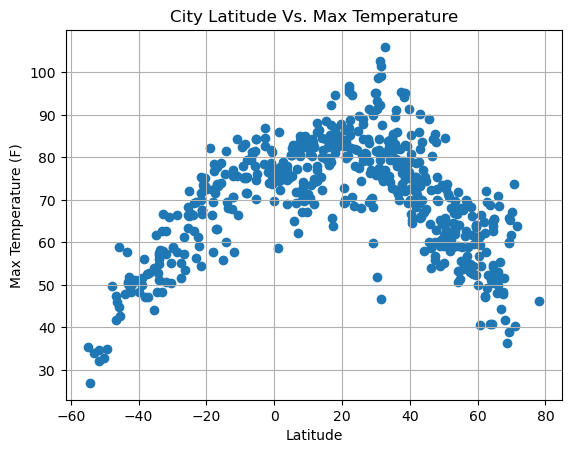

In [24]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Max Temp"]
plt.scatter(x_axis,y_axis)

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

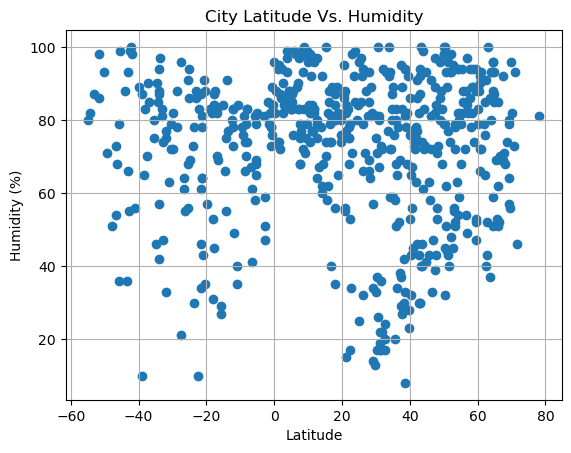

In [10]:
# Build scatter plot for latitude vs. humidity
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Humidity"]
plt.scatter(x_axis,y_axis)

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

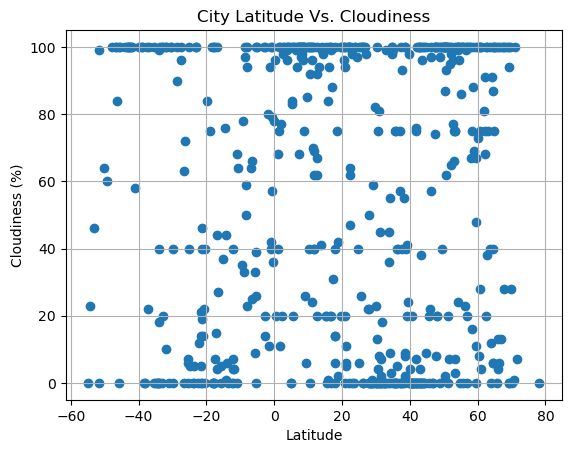

In [11]:
# Build scatter plot for latitude vs. cloudiness
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Cloudiness"]
plt.scatter(x_axis,y_axis)

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

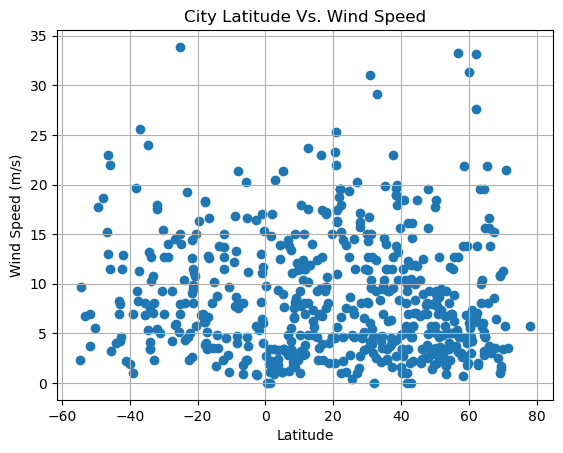

In [12]:
# Build scatter plot for latitude vs. wind speed
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Wind Speed"]
plt.scatter(x_axis,y_axis)

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plot
def lrgPlot(x,y,e,z,location):
    results = linregress(x,y)
    rvalue = round(results.rvalue, 2)
    regress_values = x * results.slope + results.intercept
    line_equ = "y = " + str(round(results.slope, 2)) + "x +" + str(round(results.intercept,2))
    
    print(f"The r-value is: {rvalue}")
    
    plt.scatter(x, y)
    plt.plot(x, regress_values, "r-")
    plt.title(f"{e} Latitude vs {z}")
    plt.xlabel("Latitude")
    plt.ylabel(f"{z}")
    plt.annotate(line_equ, location, fontsize=10, color="red")
    plt.show()
    
    return

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ust'-ilimsk,58.0006,102.6619,68.25,78,67,2.59,RU,1691542570
2,thompson,55.7435,-97.8558,55.56,88,100,12.66,CA,1691542571
3,hamilton,39.1834,-84.5333,78.24,68,20,10.36,US,1691542475
4,dudinka,69.4058,86.1778,65.62,57,94,1.66,RU,1691542571
5,bethel,41.3712,-73.4140,73.49,74,0,8.05,US,1691542406


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,34.83,71,60,17.72,TF,1691542570
6,invercargill,-46.4000,168.3500,46.02,68,84,13.00,NZ,1691542572
7,waitangi,-43.9535,-176.5597,47.82,88,100,4.00,NZ,1691542572
9,puerto natales,-51.7236,-72.4875,34.77,98,99,3.76,CL,1691542572
10,adamstown,-25.0660,-130.1015,72.19,86,100,33.87,PN,1691542573


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.62


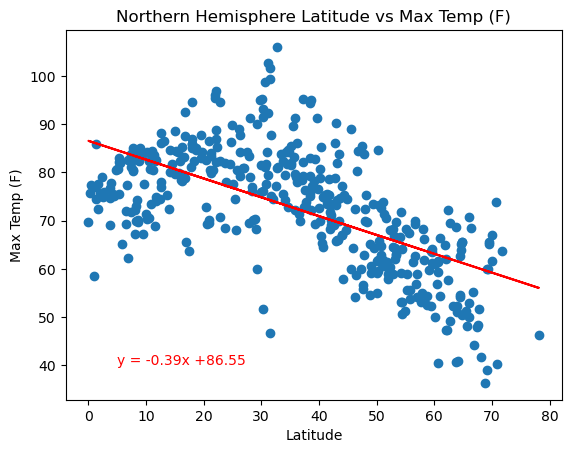

In [25]:
# Linear regression on Northern Hemisphere
lrgPlot(x = northern_hemi_df["Lat"], y = northern_hemi_df["Max Temp"], e = str("Northern Hemisphere"), z = str("Max Temp (F)"), location = (5,40))

The r-value is: 0.89


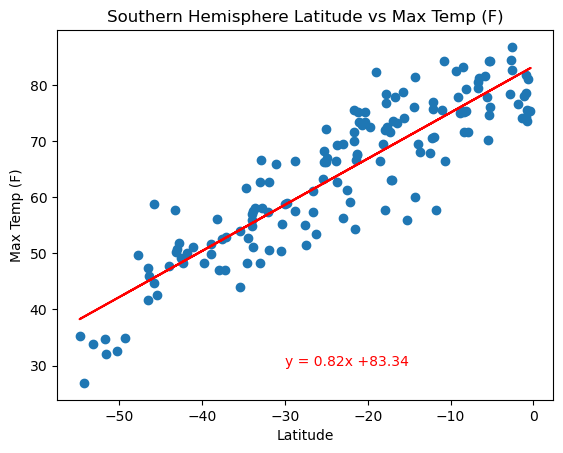

In [26]:
# Linear regression on Southern Hemisphere
lrgPlot(x = southern_hemi_df["Lat"], y = southern_hemi_df["Max Temp"], e = str("Southern Hemisphere"), z = str("Max Temp (F)"), location = (-30,30) )

**Discussion about the linear relationship:** The Northern Hemisphere linear relation is negative. The Southern Hemisphere linear relation is positive. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.15


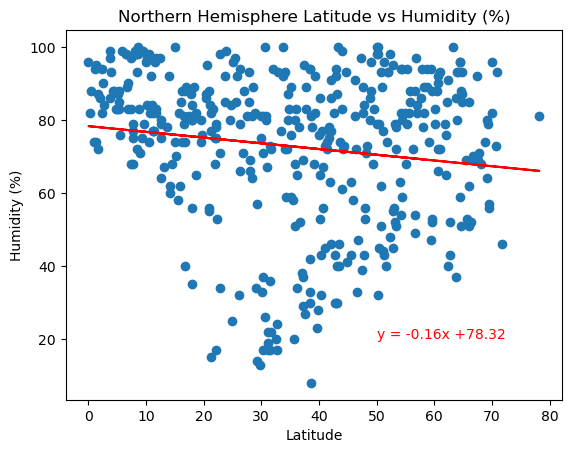

In [18]:
# Northern Hemisphere
lrgPlot(x = northern_hemi_df["Lat"], y = northern_hemi_df["Humidity"], e = str("Northern Hemisphere"), z = str("Humidity (%)"), location = (50,20))

The r-value is: -0.08


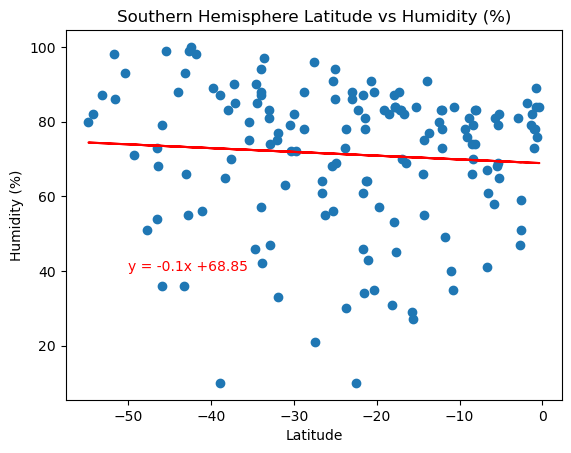

In [19]:
# Southern Hemisphere
lrgPlot(x = southern_hemi_df["Lat"], y = southern_hemi_df["Humidity"], e = str("Southern Hemisphere"), z = str("Humidity (%)"), location = (-50,40))

**Discussion about the linear relationship:** The Northern Hemisphere linear relation is negative. The Southern Hemisphere linear relation is negative. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.09


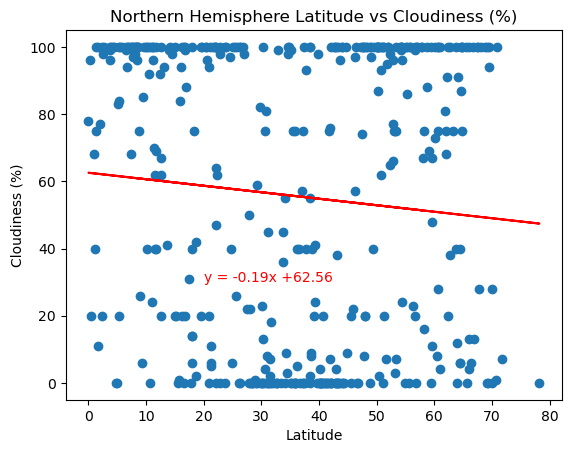

In [20]:
# Northern Hemisphere
lrgPlot(x = northern_hemi_df["Lat"], y = northern_hemi_df["Cloudiness"], e = str("Northern Hemisphere"), z = str("Cloudiness (%)"), location = (20,30))

The r-value is: -0.15


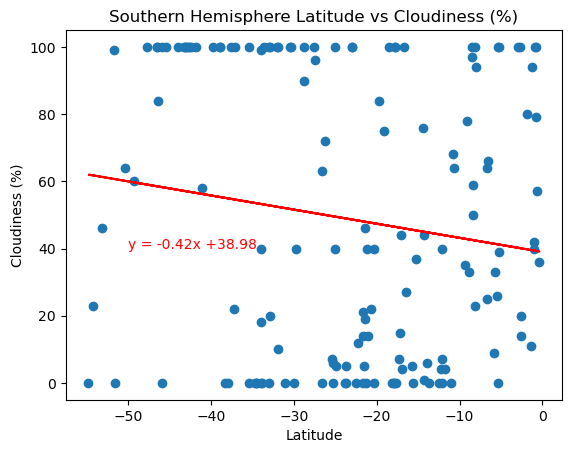

In [21]:
# Southern Hemisphere
lrgPlot(x = southern_hemi_df["Lat"], y = southern_hemi_df["Cloudiness"], e = str("Southern Hemisphere"), z = str("Cloudiness (%)"), location = (-50,40))

**Discussion about the linear relationship:** The Northern Hemisphere linear relation is negative. The Southern Hemisphere linear relation is negative. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.02


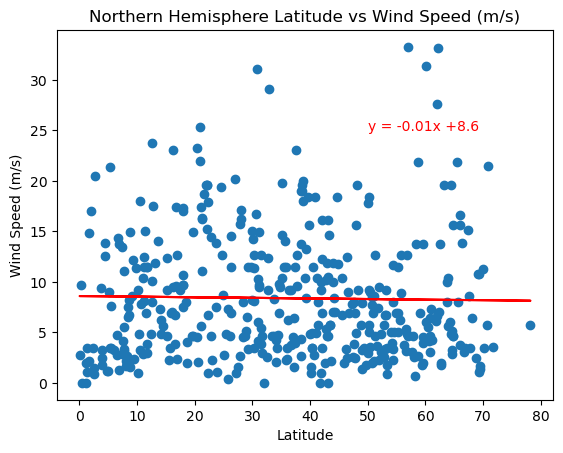

In [28]:
# Northern Hemisphere
lrgPlot(x = northern_hemi_df["Lat"], y = northern_hemi_df["Wind Speed"], e = str("Northern Hemisphere"), z = str("Wind Speed (m/s)"), location = (50,25))

The r-value is: -0.08


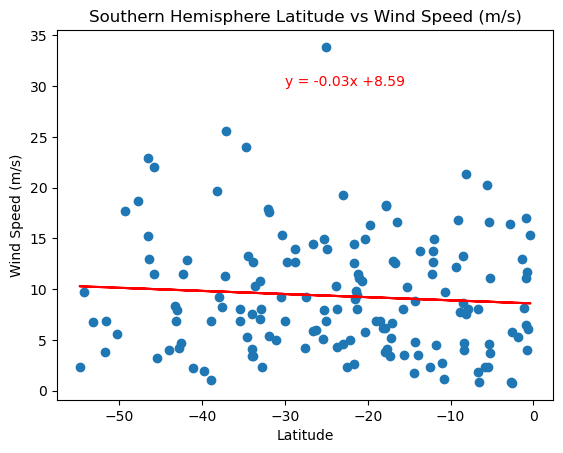

In [27]:
# Southern Hemisphere
lrgPlot(x = southern_hemi_df["Lat"], y = southern_hemi_df["Wind Speed"], e = str("Southern Hemisphere"), z = str("Wind Speed (m/s)"), location = (-30,30))

**Discussion about the linear relationship:** The Northern Hemisphere linear relation is negative. The Southern Hemisphere linear relation is negative. 